In [1]:
from yfinance import download
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Filtro Super Bandpass de Jonh Ehlers

Referencia: http://traders.com/Documentation/FEEDbk_docs/2016/07/TradersTips.html

In [2]:
def super_bandpass(data_base, flen = 40, slen = 60, column='Close'):
    '''Función que devuelve un dataframe con el filtro super bandpass calculado'''
    
    data = data_base.copy()
    
    a1= 5/flen
    a2= 5/slen

    pb = [data[column].iloc[:2].mean()] * 2
    # pb = [0, 0]
    for f in range(2, data.shape[0]):
        pb_n = (a1 - a2) * data[column].iloc[f] + (a2*(1 - a1) - a1 * (1 - a2))* data[column].iloc[f - 1] + ((1 - a1) + (1 - a2))*(pb[f-1])- (1 - a1)* (1 - a2)*(pb[f-2])
        pb += [pb_n]
    data['PB'] = pb

    data['RMS+'] = data['PB'].pow(2).rolling(50).sum().div(50).pow(.5)
    data['RMS-'] = -data['RMS+']

    data['Sell Signal'] = data['PB'].lt(data['RMS+']) & data['PB'].shift().gt(data['RMS+'].shift())
    data['Buy Signal'] = data['PB'].gt(data['RMS-']) & data['PB'].shift().lt(data['RMS-'].shift())
    
    return data

In [3]:
def plot_super_bandpass(data):
    '''Función para graficar el filtro super bandapass'''
    fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    axs[1].fill_between(data.index, data['RMS+'], data['RMS-'], color='g', alpha=.2)
    data['Close'].plot(ax=axs[0])
    data['Sell Signal'].mul(data['Close']).replace({0: np.nan}).plot(marker='v', color='r', ax=axs[0])
    data['Buy Signal'].mul(data['Close']).replace({0: np.nan}).plot(marker='^', color='g', ax=axs[0])
    data['PB'].plot(color='orange', figsize=(18, 12), ax=axs[1])
    data['Sell Signal'].mul(data['PB']).replace({0: np.nan}).plot(marker='v', color='r', ax=axs[1])
    data['Buy Signal'].mul(data['PB']).replace({0: np.nan}).plot(marker='^', color='g', ax=axs[1])

In [4]:
symbol = 'MMM'
data = download(symbol, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
data_sbp = super_bandpass(data)
data_sbp

,Open,High,Low,Close,Volume,PB,RMS+,RMS-,Sell Signal,Buy Signal
Date,,,,,,,,,,
1970-01-02,1.437719,1.445916,1.436080,1.437719,72000,1.441819,NaN,NaN,False,False
1970-01-05,1.439360,1.447557,1.439360,1.445918,446400,1.441819,NaN,NaN,False,False
1970-01-06,1.445917,1.460671,1.444277,1.460671,176000,1.427414,NaN,NaN,False,False
1970-01-07,1.460671,1.472146,1.457392,1.468867,164800,1.401334,NaN,NaN,False,False
1970-01-08,1.468868,1.491819,1.465589,1.488540,304000,1.366637,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-01-03,178.320007,179.089996,175.839996,177.740005,1930700,0.057661,0.487951,-0.487951,False,False
2022-01-04,178.479996,181.259995,178.029999,180.229996,2522200,0.211975,0.483902,-0.483902,False,False
2022-01-05,177.130005,181.779999,177.000000,179.490005,2952400,0.302707,0.482993,-0.482993,False,False


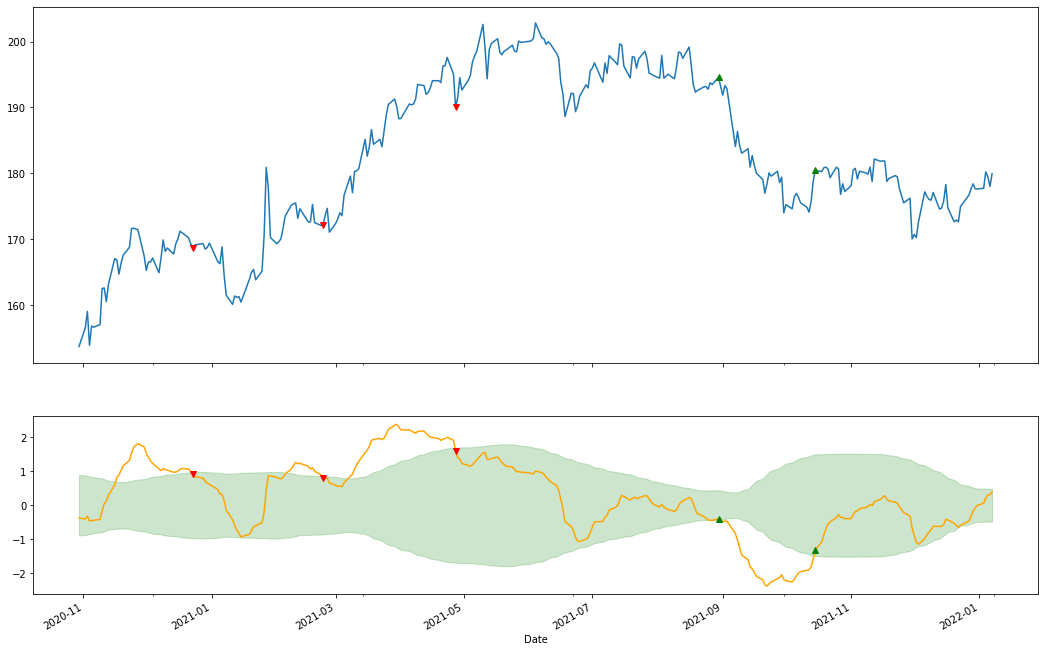

In [6]:
plot_super_bandpass(data_sbp[-300:])